# Introdução à Ciência de Dados - Trabalho Módulo 3

## Criando um modelo de predição de preços de carros usados

In [1]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('cars_dataset_mod2.csv')

In [3]:
df.head()

,Modelo,Marca,Tipo de veículo,Ano,Quilometragem,Potência do motor,Combustível,Câmbio,Direção,Cor,Portas,Final de placa,CEP,Município,Bairro,price,motor,url
0,FIAT TORO FREEDOM 1.8 16V FLEX AUT.,FIAT,Pick-up,2017,86200.0,1.8,Flex,Automático,Hidráulica,Preto,4.0,5.0,76964008.0,Cacoal,Princesa Isabel,82500.0,1.8,https://ro.olx.com.br/rondonia/autos-e-pecas/c...
1,VW - VOLKSWAGEN UP! TAKE 1.0 TOTAL FLEX 12V 5P,VW - VOLKSWAGEN,Hatch,2015,100000.0,1.0,Flex,Manual,Hidráulica,Branco,4.0,7.0,76890000.0,Jaru,NaN,32500.0,1.0,https://ro.olx.com.br/rondonia/autos-e-pecas/c...
2,GM - CHEVROLET PRISMA SED. LT 1.4 8V FLEXPOWER 4P,GM - CHEVROLET,Sedã,2017,64000.0,1.4,Flex,Manual,Elétrica,Preto,4.0,1.0,76821468.0,Porto Velho,Rio Madeira,52900.0,1.4,https://ro.olx.com.br/rondonia/autos-e-pecas/c...
3,FIAT SIENA ELX 1.0 MPI FIRE/FIRE FLEX 8V 4P,FIAT,Passeio,2007,125869.0,1.0,Flex,Manual,Mecânica,Branco,4.0,4.0,76812476.0,Porto Velho,Três Marias,14000.0,1.0,https://ro.olx.com.br/rondonia/autos-e-pecas/c...
4,FIAT IDEA ADV.EXT./ADV.EXT. LOC. 1.8 FLEX 5P,FIAT,Hatch,2013,40000.0,1.8,Flex,Automático,Hidráulica,Verde,4.0,7.0,76890000.0,Jaru,NaN,33000.0,1.8,https://ro.olx.com.br/rondonia/autos-e-pecas/c...


#### Removendo colunas que não serão usadas

In [4]:
df = df.drop(columns=['Modelo', 'Potência do motor', 'Final de placa', 'CEP', 'Município', 'Bairro', 'url'])

In [5]:
df.head()

,Marca,Tipo de veículo,Ano,Quilometragem,Combustível,Câmbio,Direção,Cor,Portas,price,motor
0,FIAT,Pick-up,2017,86200.0,Flex,Automático,Hidráulica,Preto,4.0,82500.0,1.8
1,VW - VOLKSWAGEN,Hatch,2015,100000.0,Flex,Manual,Hidráulica,Branco,4.0,32500.0,1.0
2,GM - CHEVROLET,Sedã,2017,64000.0,Flex,Manual,Elétrica,Preto,4.0,52900.0,1.4
3,FIAT,Passeio,2007,125869.0,Flex,Manual,Mecânica,Branco,4.0,14000.0,1.0
4,FIAT,Hatch,2013,40000.0,Flex,Automático,Hidráulica,Verde,4.0,33000.0,1.8


In [6]:
item_counts = df["motor"].value_counts(normalize=True)
item_counts

1.0            0.284117
1.6            0.197459
2.0            0.133280
1.4            0.116196
1.8            0.093279
1.5            0.045857
2.8            0.023195
3.0            0.018358
2.5            0.014393
2.4            0.011580
3.2            0.009676
1.3            0.009543
2.0 - 2.9      0.009506
2.7            0.005105
2.3            0.004608
2.2            0.004341
3.5            0.002971
3.6            0.002049
1.2            0.001892
1.7            0.001746
1.1            0.001576
3.0 - 3.9      0.001394
3.3            0.001310
1.9            0.000970
3.8            0.000946
4.2            0.000582
6.2            0.000582
6.7            0.000509
3.9            0.000509
4.3            0.000461
4.0 ou mais    0.000315
4.4            0.000243
5.0            0.000218
4.0            0.000206
3.7            0.000206
5.9            0.000146
4.5            0.000146
4.8            0.000097
4.7            0.000097
3.4            0.000097
5.7            0.000073
4.1            0

In [7]:
df = df.replace(to_replace='2.0 - 2.9', value=2.5)
df = df.replace(to_replace='3.0 - 3.9', value=3.5)

In [8]:
# Remove '4.0 ou mais' que representa apenas 0.03% do dataset 
# e não tem uma média direta para substituir
df = df[df.motor != '4.0 ou mais']

In [9]:
item_counts = df["motor"].value_counts(normalize=True)
item_counts

1.0    0.284207
1.6    0.197521
2.0    0.133322
1.4    0.116232
1.8    0.093308
1.5    0.045872
2.8    0.023203
3.0    0.018363
2.5    0.014397
2.4    0.011583
3.2    0.009679
1.3    0.009546
2.5    0.009509
2.7    0.005106
2.3    0.004609
2.2    0.004342
3.5    0.002972
3.6    0.002050
1.2    0.001892
1.7    0.001747
1.1    0.001577
3.5    0.001395
3.3    0.001310
1.9    0.000970
3.8    0.000946
6.2    0.000582
4.2    0.000582
3.9    0.000509
6.7    0.000509
4.3    0.000461
4.4    0.000243
5.0    0.000218
3.7    0.000206
4.0    0.000206
4.5    0.000146
5.9    0.000146
4.7    0.000097
4.8    0.000097
3.4    0.000097
5.7    0.000073
4.1    0.000036
2.9    0.000036
5.2    0.000024
2.6    0.000024
4.6    0.000024
6.0    0.000012
5.8    0.000012
Name: motor, dtype: float64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85773 entries, 0 to 85798
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Marca            85160 non-null  object 
 1   Tipo de veículo  74778 non-null  object 
 2   Ano              85773 non-null  int64  
 3   Quilometragem    85773 non-null  float64
 4   Combustível      83337 non-null  object 
 5   Câmbio           83817 non-null  object 
 6   Direção          73250 non-null  object 
 7   Cor              75672 non-null  object 
 8   Portas           81871 non-null  float64
 9   price            85773 non-null  float64
 10  motor            82447 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 7.9+ MB


In [11]:
# (df[df['price'] > 150000]).shape

/home/fabio/.virtualenvs/data_science/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 59764.36 and sigma = 46483.39



Text(0.5, 1.0, 'Price distribution')

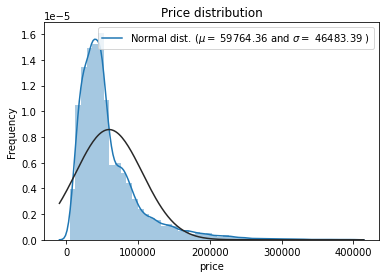

In [12]:
sns.distplot(df['price'] , fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

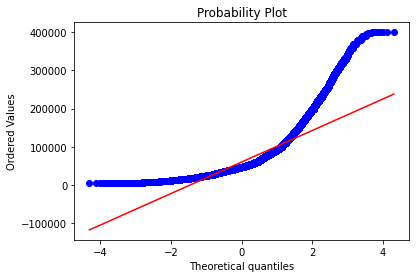

In [13]:
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)
plt.show()

Modelos lineares trabalham bem com dados normalmente distribuídos e os preços não estão normalmente distribuídos. Como forma de tentar melhorar isso, nós podemos transformar essa variável e fazê-la mais normalmente distribuída. Para isso podemos aplicar uma função logaritmica f(x) = log(1+x)

In [14]:
# df['price'] = np.log1p(df['price'])

In [15]:
# sns.distplot(df['price'] , fit=norm)

# # Get the fitted parameters used by the function
# (mu, sigma) = norm.fit(df['price'])
# print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# #Now plot the distribution
# plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
#             loc='best')
# plt.ylabel('Frequency')
# plt.title('Price distribution')

In [16]:
#Get also the QQ-plot
# fig = plt.figure()
# res = stats.probplot(df['price'], plot=plt)
# plt.show()

### Feature Engineering

<AxesSubplot:>

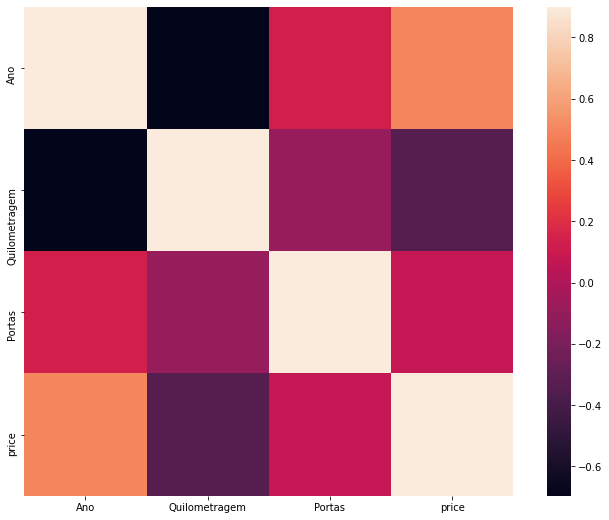

In [17]:
#Correlation map to see how features are correlated with SalePrice
corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [18]:
# Verificando a porcentagem de dados faltantes para cada coluna
all_data_na = (df.isnull().sum() / len(df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
Direção,14.600166
Tipo de veículo,12.818719
Cor,11.776433
Portas,4.549217
motor,3.877677
Combustível,2.840055
Câmbio,2.280438
Marca,0.714677


In [19]:
df.shape

(85773, 11)

In [20]:
# Remove linhas que contenham dados faltantes.
df = df.dropna()
df.shape

(63559, 11)

Essa operação reduziu o tamanho do dataset de 85773 para 63559. Como ainda temos muitos dados, primeiro faremos um teste com todas as colunas completas. Dependendo do resultado obtido, podemos adicionar novamente os dados que foram deletados.

In [21]:
df['Marca'] = df['Marca'].astype(str)
df['Tipo de veículo'] = df['Tipo de veículo'].astype(str)
df['Ano'] = df['Ano'].astype(int)
df['Combustível'] = df['Combustível'].astype(str)
df['Câmbio'] = df['Câmbio'].astype(str)
df['Direção'] = df['Direção'].astype(str)
df['Cor'] = df['Cor'].astype(str)
df['Portas'] = df['Portas'].astype(str)
df['motor'] = df['motor'].astype(float)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63559 entries, 0 to 85798
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Marca            63559 non-null  object 
 1   Tipo de veículo  63559 non-null  object 
 2   Ano              63559 non-null  int64  
 3   Quilometragem    63559 non-null  float64
 4   Combustível      63559 non-null  object 
 5   Câmbio           63559 non-null  object 
 6   Direção          63559 non-null  object 
 7   Cor              63559 non-null  object 
 8   Portas           63559 non-null  object 
 9   price            63559 non-null  float64
 10  motor            63559 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 5.8+ MB


### Label encoding

In [23]:
cols = ('Marca', 'Tipo de veículo', 'Combustível', 'Câmbio', 'Direção', 'Cor', 'Portas')

for col in cols:
    label = LabelEncoder()
    label.fit(list(df[col].values))
    df[col] = label.transform(list(df[col].values))
    
df.shape

(63559, 11)

### Separando os dados em treino e teste

Vamos separar os dados em 80% do conjunto para treino e 20% para teste

In [24]:
train, test = train_test_split(df, test_size=0.2)
y_train = train.price.values
y_test = test.price.values

X_train = train.drop(columns=['price'])
X_test = test.drop(columns=['price'])

In [25]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50847, 10), (50847,), (12712, 10), (12712,))

### Scaling

Conforme a exploração dos dados mostrada anteriormente (modulo 2), foi visto que os dados não são normalmente distribuídos. Sem aplicar uma escala apropriada, os modelos de machine learning vão tentar desprezar coeficientes de features que possuem um valor mais baixo porque o impacto deles será bem pequeno comparados aos valores de features maiores.

Min-max scaler subtrai o menor valor na coluna e então divide pela diferença entre o maior e o menor. Além disso, esse tipo de scaler não distorce os dados e é apropriado para quando se tem dados não normalmente distribuídos.

In [26]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()   
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

### Criação dos modelos

## Random Forest

In [27]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
accuracy = regressor.score(X_test, y_test)

In [28]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [29]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 6851.13
Root Mean Squared Error: 13441.67


Aumentando o número de árvores de 20 pra 200

In [30]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [31]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 6664.23
Root Mean Squared Error: 13043.74


Com 10x mais árvores o modelo teve uma melhora bem baixa

### Analisando a relevância das features

In [32]:
rf = regressor
features = df.drop('price', axis=1)

feature_list = list(features.columns)
features = np.array(features)

In [33]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Câmbio               Importance: 0.31
Variable: Combustível          Importance: 0.21
Variable: Ano                  Importance: 0.2
Variable: motor                Importance: 0.11
Variable: Marca                Importance: 0.07
Variable: Quilometragem        Importance: 0.05
Variable: Tipo de veículo      Importance: 0.02
Variable: Cor                  Importance: 0.01
Variable: Direção              Importance: 0.0
Variable: Portas               Importance: 0.0


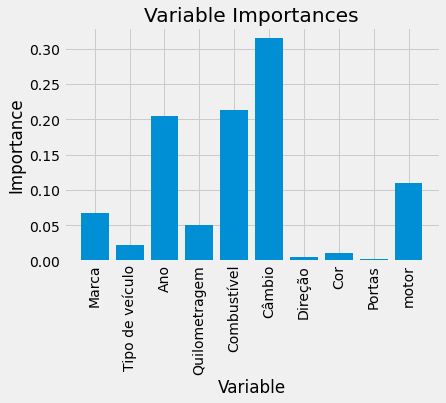

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

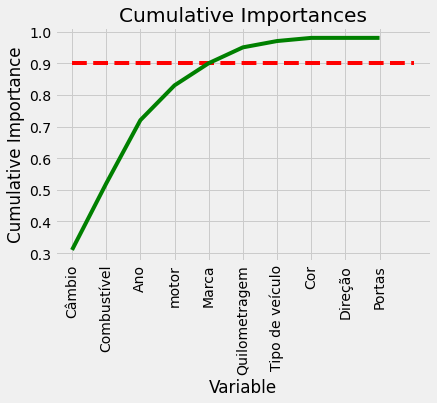

In [35]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 90% of importance retained
plt.hlines(y = 0.90, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance');
plt.title('Cumulative Importances');

In [36]:
# Find number of features for cumulative importance of 95%

# Add 1 because Python is zero-indexed
print('Number of features for 90% importance:', np.where(cumulative_importances > 0.90)[0][0] + 1)

Number of features for 90% importance: 6


Criando um novo modelo com as 5 features mais importantes

In [37]:
# New random forest with only the most important variables
from sklearn.ensemble import RandomForestRegressor
rf_most_important = RandomForestRegressor(n_estimators=200, random_state=0)

In [38]:
# Extract the most important features
features= df.drop('price', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)


important_indices = [feature_list.index('Câmbio'), feature_list.index('Ano'), 
                     feature_list.index('Combustível'), feature_list.index('motor'),
                     feature_list.index('Marca')]
train_important = X_train[:, important_indices]
test_important = X_test[:, important_indices]

In [39]:
# Train the random forest
rf_most_important.fit(train_important, y_train)

RandomForestRegressor(n_estimators=200, random_state=0)

In [40]:
predictions = rf_most_important.predict(test_important)

In [41]:
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, predictions),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, predictions)),2))

Mean Absolute Error: 6965.66
Mean Squared Error: 171935708.83
Root Mean Squared Error: 13112.43


### XGBoost

In [42]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import xgboost as xgb

In [43]:
# fit model (base parameters - without tuning)
dmatrix = xgb.DMatrix(data=X_train, label=y_train)

params = {'objective': 'reg:squarederror'}
cv_results = xgb.cv(
    dtrain=dmatrix,
    params=params,
    nfold=10,
    metrics={'mae', 'rmse'},
    as_pandas=True,
    seed=20,
)
print('Mean Absolute Error: %.2f' % cv_results['test-mae-mean'].min())
print('Root Mean Squared Error: %.2f' % cv_results['test-rmse-mean'].min())

Mean Absolute Error: 8226.31
Root Mean Squared Error: 14887.40


### Fine tuning

#### Grid Search

In [44]:
from sklearn.model_selection import GridSearchCV

params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

xgbr = xgb.XGBRegressor(seed = 20)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)

Descomentar linhas abaixo para realizar o grid search

In [ ]:
# clf.fit(X_train, y_train)
# print("Best parameters:", clf.best_params_)
# print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

```
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 1000}
Lowest RMSE:  11723.696949769306
```

#### Random Search

In [45]:
from sklearn.model_selection import RandomizedSearchCV

params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}

xgbr = xgb.XGBRegressor(seed = 20)
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=1)

Descomentar linhas abaixo para realizar o random search

In [ ]:
# clf.fit(X_train, y_train)
# print("Best parameters:", clf.best_params_)
# print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

```
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'subsample': 0.7999999999999999, 'n_estimators': 500, 'max_depth': 20, 'learning_rate': 0.01, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.8999999999999999}
Lowest RMSE:  11996.287009941268
```

In [46]:
# fit model (best parameters - tunned)
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, learning_rate = 0.1,
                max_depth = 6, alpha = 10, n_estimators = 1000, seed=20)

xgb_model.fit(X_train, y_train)

preds = xgb_model.predict(X_test)

In [47]:
mae = metrics.mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 6368.397503343298
RMSE: 11387.017359367253


MAE  = 6440
RMSE = 11903

Houve uma melhoria significativa usando XGBoost com fine tuning em relação ao melhor modelo anterior (Random Forest com 200 trees - MAE: 6704.07, RMSE: 13267.71). Uma redução de 4% em relação ao MAE e uma redução de mais de 10,24% em relação ao RMSE obtidos pelo Random Forest.

Esse é um bom resultado se a gente levar em consideração preços mais elevados, mas para baixos preços pode ser bem ruim. Para tentar reduzir esse erro podemos tentar limitar um pouco mais o dataset em relação aos preços para tentar acertar os preços apenas de carros mais populares.

/home/fabio/.virtualenvs/data_science/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 57769.62 and sigma = 45480.04



Text(0.5, 1.0, 'Price distribution')

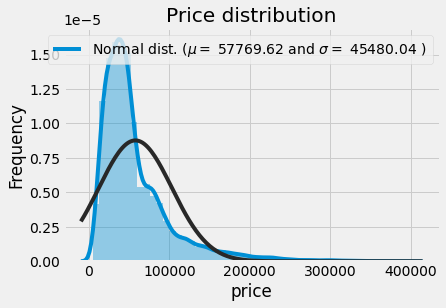

In [48]:
sns.distplot(df['price'] , fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

Como podemos observar pela distribuição dos preços, carros acima de R\\$ 150k são bem raros no dataset. Também limitaremos inferiormente em R\$ 20k, que é em torno de um carro antigo popular, isso pode evitar muitos outliers.

In [49]:
df = df[df['price'] <= 150000]
df = df[df['price'] >= 20000]
df

,Marca,Tipo de veículo,Ano,Quilometragem,Combustível,Câmbio,Direção,Cor,Portas,price,motor
0,12,5,2017,86200.0,1,0,2,7,1,82500.0,1.8
1,53,3,2015,100000.0,1,1,2,2,1,32500.0,1.0
2,17,7,2017,64000.0,1,1,1,7,1,52900.0,1.4
4,12,3,2013,40000.0,1,0,2,8,1,33000.0,1.8
5,12,5,2014,90000.0,1,1,2,2,0,44000.0,1.4
...,...,...,...,...,...,...,...,...,...,...,...
85793,41,6,2020,24000.0,1,0,1,2,1,99990.0,1.6
85794,12,3,2016,65000.0,1,1,2,3,1,34800.0,1.0
85795,53,3,2012,80000.0,1,1,2,6,1,26990.0,1.0
85796,12,3,2019,32900.0,1,1,1,6,1,45900.0,1.3


In [50]:
train, test = train_test_split(df, test_size=0.2)
y_train = train.price.values
y_test = test.price.values

X_train = train.drop(columns=['price'])
X_test = test.drop(columns=['price'])

In [51]:
# fit model (best parameters - tunned)
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, learning_rate = 0.1,
                max_depth = 6, alpha = 10, n_estimators = 1000, seed=20)

xgb_model.fit(X_train, y_train)

preds = xgb_model.predict(X_test)

In [52]:
mae = metrics.mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 5416.541247750423
RMSE: 8460.27914476452


## Resultados


| Método | MAE | RMSE |
| --- | --- | --- |
| Random Forest (n=20) | 6786.68 | 13150.56 |
| Random Forest (n=200) | 6682.56 | 13015.13 |
| Random Forest (n=200, somente 6 principais features) | 7022.75 | 13123.46 |
| XGBoost (default parameters) | 8235.51 | 14993.67 |
| XGBoost (fine tunned) | 6449.54 | 11739.78 |
| XGBoost (fine tunned, com dataset limitado entre R\\$ 20k a R\$150k) | **5416.54** | **8460.28** |